# Project 3B: Modeling

## 1. Preface

For the modeling process, I created a number of classifiers, and tested out several different hyperparameters in order to find the best predictors. An important note: All of the initial models optimized with GridSearchCV that are below, were run only on the titles of both subreddits. This was done primarily to save time and computational demand, and since all titles are filled in, it still seemed a viable initial training method to find a good estimator and set of hyperparameters. 

Once the 'best' model was found using this method, it was run with its best hyperparamaters on a new column created from the master dataset, 'all_text, which combines both title and selftext for each and every post.

## 2. Imports and Read-In

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.neighbors import KNeighborsClassifier

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
import re

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

##### Reading in the cleaned Master DataFrame that we created and exported in Notebook 3A.

In [2]:
master_df = pd.read_csv('./master_df.csv',keep_default_na=False).drop(columns='Unnamed: 0')

In [3]:
master_df.head()

,title,author,selftext,created_utc,subreddit
0,I think I got lucky with Corsair,code4109,Just started investing this month and this is ...,1601600412,1
1,help please im noob,bugiii3,NO_TEXT,1601598645,1
2,Why do stocks go up?,Illustrious-Twist-19,NO_TEXT,1601598583,1
3,How do I set up an account?,GoISU25,I just recently downloaded Robinhood and have ...,1601597880,1
4,Holding til things settle?,[deleted],NO_TEXT,1601597840,1


## 3. Initializing Variables and Training Setup

In [4]:
y = (master_df['subreddit'])
X = master_df['title']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [6]:
my_tokenizer = RegexpTokenizer("[a-zA-Z0-9.]+")

In [7]:
my_stop = ['no_text', '\n&gt;' ,'https', 'com', 'www', 'don']
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop)

cvect = CountVectorizer(stop_words=stop_words,max_features=300)
tfidf = TfidfVectorizer(stop_words=stop_words,max_features=300)

In [8]:
def split_lem(text):
    text = text.lower()
    lem = WordNetLemmatizer()
    return ' '.join([lem.lemmatize(word) for word in text.split()])

In [9]:
def split_stem(text):
    text = text.lower()
    p_stemmer = PorterStemmer()
    return ' '.join([p_stemmer.stem(word) for word in text.split()])

## 4. Classifier Testing

### Logistic Regression With CVect

In [10]:
pipe = make_pipeline(cvect,LogisticRegression())
params = {
    'countvectorizer__ngram_range': [(1,1),(1,2)],
    'countvectorizer__preprocessor':[split_stem,split_lem],
    'countvectorizer__max_features':[600,2000,5000],
    'logisticregression__C':[0.4,0.5],
    
}

In [11]:
grid = GridSearchCV(pipe,params,n_jobs=-1)

In [12]:
grid.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['gt', 'ha', 'http', 'le', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=300,
                                                        stop_words=frozenset({'\n'
                                                                              '&gt;',
                                                                              'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against'

In [13]:
grid.best_params_

{'countvectorizer__max_features': 5000,
 'countvectorizer__ngram_range': (1, 2),
 'countvectorizer__preprocessor': <function __main__.split_lem(text)>,
 'logisticregression__C': 0.5}

In [14]:
grid.score(X_train,y_train)

0.9009

In [15]:
grid.score(X_test,y_test)

0.8698

##### Pretty good! Certainly better than random chance. We'll use this as a starting point, and bring some of these best parameters forward to test different models and vectorizers, and hopefully speed up gridsearches as we continue to gain a better understanding of which parameters are best.

### Logistic With TDIDF

In [38]:
pipe = make_pipeline(tfidf,LogisticRegression())
params = {
    'tfidfvectorizer__ngram_range': [(1,1)],
    'tfidfvectorizer__preprocessor':[split_stem],
    'tfidfvectorizer__max_features':[100,300,600],
    'logisticregression__C':[0.4,0.5],
    
}

In [39]:
grid = GridSearchCV(pipe,params,n_jobs=-1)

In [40]:
grid.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'gt', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'http', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_w

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(max_features=100,
                                                        stop_words=frozenset({'\n'
                                                                              '&gt;',
                                                                              'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against'

In [41]:
grid.best_params_

{'logisticregression__C': 0.5,
 'logisticregression__fit_intercept': True,
 'tfidfvectorizer__max_features': 600,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__preprocessor': <function __main__.split_stem(text)>}

In [42]:
grid.score(X_train,y_train)

0.8567666666666667

In [43]:
grid.score(X_test,y_test)

0.8485

##### Pretty close to CVect.

### NBayes With TFIDF

In [68]:
pipe_bayes = make_pipeline(tfidf,MultinomialNB())
params = {
    'tfidfvectorizer__ngram_range': [(1,1)],
    'tfidfvectorizer__preprocessor':[split_stem],
    'multinomialnb__alpha':[0.01,0.1],
    'tfidfvectorizer__max_features':[300,600]
    
}

In [69]:
grid_bayes = GridSearchCV(pipe_bayes,params)

In [70]:
grid_bayes.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'gt', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'http', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_w

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(max_features=300,
                                                        stop_words=frozenset({'\n'
                                                                              '&gt;',
                                                                              'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against'

In [71]:
grid_bayes.best_params_

{'multinomialnb__alpha': 0.1,
 'tfidfvectorizer__max_features': 600,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__preprocessor': <function __main__.split_stem(text)>}

In [72]:
grid_bayes.score(X_train,y_train)

0.8267666666666666

In [73]:
grid_bayes.score(X_test,y_test)

0.8173

##### Decent, but Logistic is still doing better.

### Random Forest With CVect

In [82]:
pipe_forest = make_pipeline(cvect,RandomForestClassifier())
params = {
    'countvectorizer__ngram_range': [(1,1)],
    'countvectorizer__preprocessor':[split_stem],
    'countvectorizer__max_features':[300,600],
    'randomforestclassifier__n_estimators':[1000],
    'randomforestclassifier__max_depth': [7,9],
    'randomforestclassifier__min_samples_leaf':[1,2]
    
}

In [83]:
grid_forest = GridSearchCV(pipe_forest,params,n_jobs=-1)

In [84]:
grid_forest.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'gt', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'http', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_w

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=300,
                                                        stop_words=frozenset({'\n'
                                                                              '&gt;',
                                                                              'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against'

In [85]:
grid_forest.best_params_

{'countvectorizer__max_features': 600,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': <function __main__.split_stem(text)>,
 'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 1000}

In [86]:
grid_forest.score(X_train,y_train)

0.7932333333333333

In [87]:
grid_forest.score(X_test,y_test)

0.7903

##### Also a solid score, but Logistic is still unbeatable!

### KNN Classifier With TFIDF

In [15]:
pipe_knn = make_pipeline(tfidf,KNeighborsClassifier())
params = {
    'countvectorizer__ngram_range': [(1,1)],
    'countvectorizer__preprocessor':[split_stem],
    'kneighborsclassifier__n_neighbors':[5,7,9],
    'countvectorizer__max_features':[300,600]
}

In [16]:
grid_knn = GridSearchCV(pipe_knn,params,n_jobs=-1)

In [17]:
grid_knn.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'gt', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'http', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_w

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(max_features=100,
                                                        stop_words=frozenset({'\n'
                                                                              '&gt;',
                                                                              'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against'

In [18]:
grid_knn.best_params_

{'kneighborsclassifier__n_neighbors': 9,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__preprocessor': <function __main__.split_stem(text)>}

In [19]:
grid_knn.score(X_train,y_train)

0.7892333333333333

In [20]:
grid_knn.score(X_test,y_test)

0.7709

##### KNN swoops in for third place, but can't budge Logistic.

# 5. Prepping and Running the Final Model

### Creating an All_text Column to Prepare for our Best Model

In [10]:
master_df['all_text'] = master_df['title'] + ' ' + master_df['selftext']
#master_df.drop(columns='all_text',inplace=True)

In [11]:
master_df.head()

,title,author,selftext,created_utc,subreddit,all_text
0,I think I got lucky with Corsair,code4109,Just started investing this month and this is ...,1601600412,1,I think I got lucky with Corsair Just started ...
1,help please im noob,bugiii3,NO_TEXT,1601598645,1,help please im noob NO_TEXT
2,Why do stocks go up?,Illustrious-Twist-19,NO_TEXT,1601598583,1,Why do stocks go up? NO_TEXT
3,How do I set up an account?,GoISU25,I just recently downloaded Robinhood and have ...,1601597880,1,How do I set up an account? I just recently do...
4,Holding til things settle?,[deleted],NO_TEXT,1601597840,1,Holding til things settle? NO_TEXT


In [12]:
X = master_df['all_text']
y = master_df['subreddit']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### Building Our Best Model Directly To Fit on All the Text

Lo and behold, our best model was a **Logistic Regression run with a CountVectorizer.** Now we will build the model directly from the ground up instead of using a GridSearch. We will also now fit on the all_text column to account for all of our text data.

In [14]:
cvect_best = CountVectorizer(
    stop_words=stop_words,
    max_features=600,
    ngram_range=(1,1),
    preprocessor=split_stem,  
)

logr_best = LogisticRegression(
    C = 0.4,  
)

In [15]:
pipe_best = make_pipeline(cvect_best,logr_best)

In [17]:
pipe_best.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=600,
                                 preprocessor=<function split_stem at 0x0000015411AF61F0>,
                                 stop_words=frozenset({'\n&gt;', 'a', 'about',
                                                       'above', 'across',
                                                       'after', 'afterwards',
                                                       'again', 'against',
                                                       'all', 'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                 

In [18]:
logr_train_score = pipe_best.score(X_train,y_train)
logr_test_score = pipe_best.score(X_test,y_test)

In [19]:
print(f'Final Train Score: {logr_train_score}')
print(f'Final Test Score:{logr_test_score}')

Final Train Score: 0.8789666666666667
Final Test Score:0.8641


In [116]:
word_coefs = pipe_best.named_steps['logisticregression'].coef_[0]
words = pipe_best.named_steps['countvectorizer'].get_feature_names()

In [118]:
word_coef_df = pd.DataFrame({'coefs': word_coefs, 'word': words})
word_coef_df.sort_values(by='coefs',ascending=False,inplace=True)

In [138]:
inv_top_coefs = word_coef_df.nlargest(20,columns='coefs')
inv_top_coefs.head()

,coefs,word
106,2.380669,billion
543,1.462762,tesla
373,1.364391,news
472,1.131783,revenu
301,0.998118,investor


In [139]:
pfin_top_coefs = word_coef_df.nsmallest(20,columns='coefs')
pfin_top_coefs.head()

,coefs,word
115,-1.411695,budget
456,-1.286917,refinanc
489,-1.244407,score
497,-1.204314,sent
455,-1.194217,refin


We will use these coefficients in the visualizations below.

# 6. Best Model: Visualizations

### Words that Pull Towards Personal Finance

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


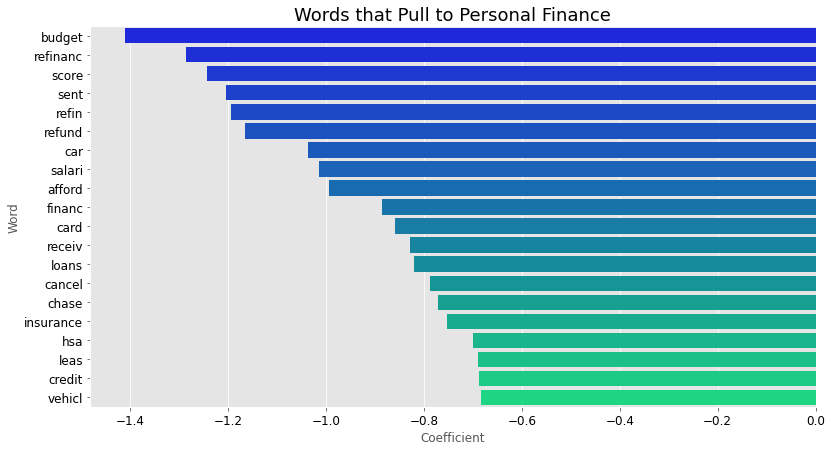

In [147]:
plt.figure(figsize = (13,7))
plt.title('Words that Pull to Personal Finance',fontsize=18)
p = sns.barplot(pfin_top_coefs['coefs'],pfin_top_coefs['word'], palette='winter')
p.set_yticklabels(p.get_yticklabels(),fontweight=50,fontsize=10)
p.set(ylabel='Word')
p.set(xlabel='Coefficient')
p.tick_params(labelsize=12,labelcolor='black')

### Words that Pull Towards Investing

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


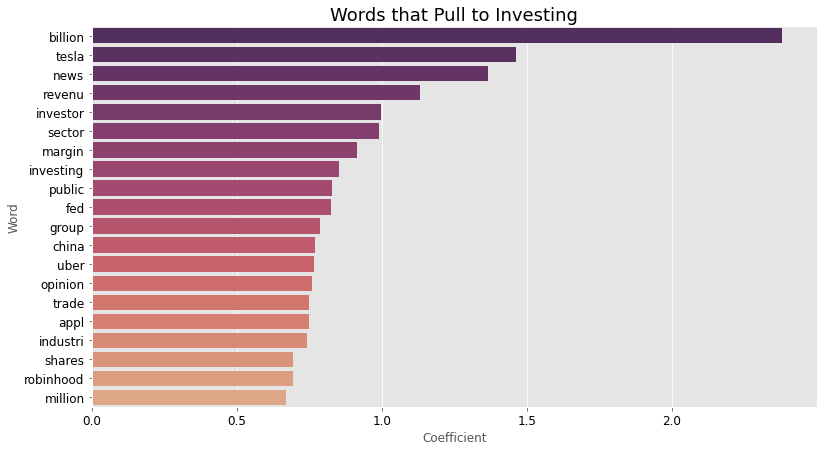

In [152]:
plt.figure(figsize = (13,7))
plt.title('Words that Pull to Investing',fontsize=18)
i = sns.barplot(inv_top_coefs['coefs'],inv_top_coefs['word'], palette='flare_r')
i.set_yticklabels(i.get_yticklabels(),fontweight=50,fontsize=10)
i.set(ylabel='Word')
i.set(xlabel='Coefficient')
i.tick_params(labelsize=12,labelcolor='black')

### Confusion Matrix

**Reminder:**
- Personal Finance: 0
- Investing: 1


In [162]:
y_preds = pipe_best.predict(X_test)

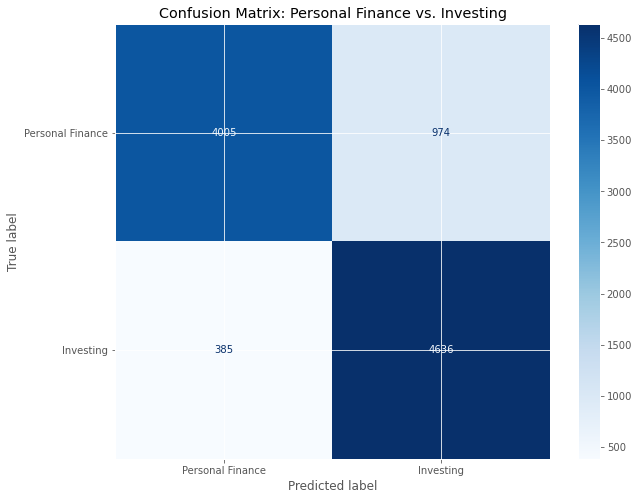

In [174]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
#plt.subplot(1,1,1)
plt.title('Confusion Matrix: Personal Finance vs. Investing')

plot_confusion_matrix(
    estimator = pipe_best,
    X = X_test,
    y_true = y_test,
    display_labels = ['Personal Finance','Investing'],
    ax=ax,
    cmap='Blues'

);

## 7. Live Predictions!

**Reminder:**
- Personal Finance: 0
- Investing: 1


In [24]:
pipe_best.predict(['I want to invest in Tesla but is it good for my investment portfolio?'])

array([1], dtype=int64)

In [25]:
pipe_best.predict(['I just lost my job, and I have some mortgage payments left, should I sell my car?'])

array([0], dtype=int64)

Looks like we're doing pretty well!

## 8. Conclusions

### Scale
Our analysis confirmed initial impressions that r/Investing tends to have discussions focusing on larger-scale financial concepts, including the stock market, large companies and their financial performance, as well as some macroeconomics and government spending. This is exemplified by some of the most influential words from this subreddit: 'Investor', 'Public', 'Fed', etc. 

On the Personal Finance side, we see financial concepts more related to individual or family finance, with discussions about account types, credit health, savings, career-related finances, etc. This is again exemplified by influential words on this side: 'budget','score','car','salari'.

### Overlap
Our most common instance of misclassification was that in which the best model misclassified a number of r/PersonalFinance posts as r/Investing. Upon some qualitative investigation, it seemed that the primary cause of this was the fact that many posts on r/PersonalFinance asked/opened discussion about investing, and these posts could justifiably have been posted on r/Investing. This put the model in a difficult position of being somewhat incapable of fully accounting for that "bleed-in," which likely also forced a cap on maximum accuracy.

It's worth noting that the best model, as well as all of those created, were based entirely on word and bigram counts, and did not truly account for sematic meaning. Using a different method of vectorization and possibly a neural network could potentially account for the sematic differences between average r/Investing posts and investing-related posts on r/Personal Finance.

### What are People Talking About?
As this analysis is by nature exploratory, it seems appropriate to pull out a couple of specific observations after modeling regarding the discourse occurring on each subreddit. 
#### Personal Finance: Tough Times
From both initial observations and insights from modeling, it becomes clear that a lot of members of r/PersonalFinance are seeking help with budgeting, and oftentimes because they are managing with limited resources. Many have been laid off or furloughed due to the COVID-19 pandemic, and are struggling to manage finances as a result of these circumstances. 
#### Investing: Tesla 
One interesting insight from our best model's word coefficients was that 'Tesla' seemed to be an important influencer for the likelihood that a prediction was r/Investing. Upon some investigation on the subreddit and a bit of outside research, my hypothesis for the reasoning behind this is the fact that Tesla has had a significant reversal in financial performance since 2019, which has significantly influenced investor interests and has likely brought in a lot of new investors. Despite somewhat slow performance in the U.S. during the pandemic, they've managed to maintain a stronger market in China that has boosted their stock price throughout most of 2020.